# Mathematical Underpinnings - Lab 2

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [12]:
def population_risk(a, sigma_eps):
    return (1-a)**2  + sigma_eps**2

### b)

In [35]:
import numpy as np
# sampling
n = 50
X = np.random.normal(0, 1, n)
eps = np.random.normal(0,1, n)
Y = X + eps

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [36]:
def empirical_risk(a, x, y):
    return np.mean((a*x - y)**2)

### c)

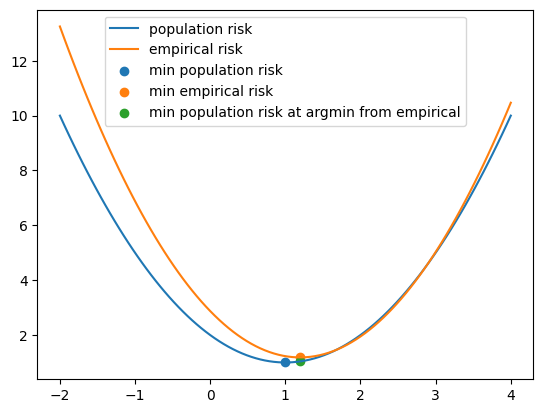

In [37]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
a = np.linspace(-2, 4, 100)
a_0 = 1
population_risk_arr =  population_risk(a, 1)
empirical_risk_arr = [empirical_risk(a_, X, Y) for a_ in a]
argmin_emp_risk = minimize(lambda a: empirical_risk(a, X, Y), 0).x
plt.plot(a, population_risk_arr, label='population risk')
plt.plot(a, empirical_risk_arr, label='empirical risk')
plt.scatter(a_0, population_risk(a_0,1), label='min population risk')
plt.scatter(argmin_emp_risk, empirical_risk(argmin_emp_risk,X,Y), label='min empirical risk')
plt.scatter(argmin_emp_risk,population_risk(argmin_emp_risk,1), label='min population risk at argmin from empirical')
plt.legend()
plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [59]:
def excess_risk(a_hat,a_0,sigma_eps):
    return population_risk(a_hat,sigma_eps) - population_risk(a_0, sigma_eps)

In [60]:
a_0 = 1
sigma_eps = 1 

In [62]:
# simulations with fixed sample size
n = 100
risks = []
for L in range(200):
        X = np.random.normal(0, 1, n)
        eps = np.random.normal(0,1, n)
        Y = X + eps
        a_hat = minimize(lambda a: empirical_risk(a, X, Y), 0).x
        risks.append(excess_risk(a_hat, a_0, sigma_eps))
print(f"Excess risk for n={n} is {np.mean(risks)}")

Excess risk for n=100 is 0.00928027885517406


In [63]:
# simulations for various sample sizes
for n in [100, 200, 400, 800]:
    risks = []
    for L in range(200):
            X = np.random.normal(0, 1, n)
            eps = np.random.normal(0,1, n)
            Y = X + eps
            a_hat = minimize(lambda a: empirical_risk(a, X, Y), 0).x
            risks.append(excess_risk(a_hat, a_0, sigma_eps))
    print(f"Excess risk for n={n} is {np.mean(risks)}")

Excess risk for n=100 is 0.010844390624053233
Excess risk for n=200 is 0.005193617961411453
Excess risk for n=400 is 0.0023745614617115295
Excess risk for n=800 is 0.0013761378444583606


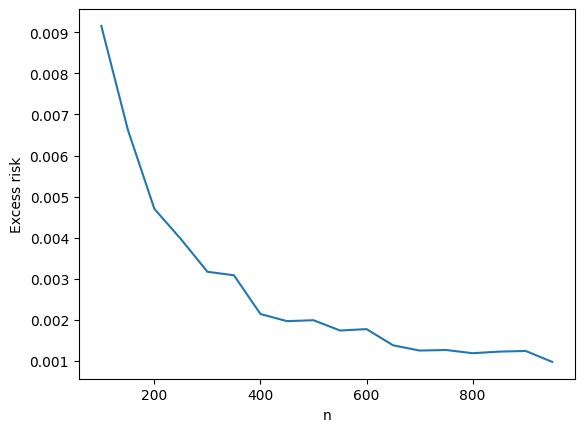

In [66]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)
summary_risks = []
for n in range(100,1000,50):
    risks = []
    for L in range(200):
        X = np.random.normal(0, 1, n)
        eps = np.random.normal(0,1, n)
        Y = X + eps
        a_hat = minimize(lambda a: empirical_risk(a, X, Y), 0).x
        risks.append(excess_risk(a_hat, a_0, sigma_eps))
    summary_risks.append(np.mean(risks))
plt.plot(range(100,1000,50), summary_risks)
plt.xlabel('n')
plt.ylabel('Excess risk')
plt.show()